In [53]:
from IPython.display import display
import numpy as np
import pandas as pd 

#!/usr/bin/env python
# import io
# import zipfile
# import requests  # $ pip install requests

pd.set_option('display.max_columns', 40) # выводить больше столбцов
pd.set_option('display.max_rows', 40)   # выводить больше строк
# plt.style.use('default')    # корректный вывод графиков в темной теме Matplotlib
# fig.show(renderer='notebook') #включение анимации

# r = requests.get("https://lms.skillfactory.ru/assets/courseware/v1/e157dad19d7511561f697586ed146dfe/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/churn.zip")
# with r, zipfile.ZipFile(io.BytesIO(r.content)) as archive:
#     archive.extractall('Data')

+ country - страна-производитель вина
+ description - подробное описание
+ designation - название виноградника, где выращивают виноград для вина
+ points - количество баллов, которое WineEnthusiast оценил вино по шкале от 1 до 100
+ price - стоимость бутылки вина
+ province - провинция или штат 
+ region_1 - винодельческий район в провинции или штате (например, Напа)
+ region_2 - конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например, Резерфорд в долине Напа), но это значение иногда может быть пустым.
+ taster_name - имя дегустатора
+ taster_twitter_handle - твиттер дегустатора
+ title - название вина, который часто содержит годи др подробную информацию
+ variety -  сорт винограда, из которого изготовлено вино (например, Пино Нуар).
+ winery - винодельня, которая производила вино

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37979,425,1229,17,19,15,118840,707,16757
top,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,36247,4480,11065,25514,25514,11,13272,222


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


None

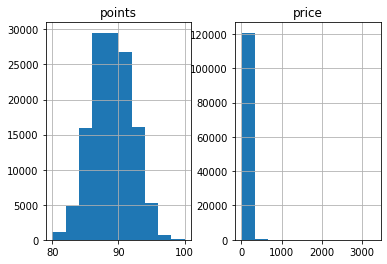

In [60]:
wine = pd.read_csv('data/wine.csv', sep=',')
display(wine.describe(include='object'))
display(wine.info())
# построим распеределение всех возможных признаков быстрой просто визуализацией
hist = wine.hist()
hist;

In [55]:
testers = wine['taster_name'].nunique()
print(f'{testers} дегустаторов')
max_price = int(wine['price'].max())
print(f'{max_price} - максимальная цена бутылки')


19 дегустаторов
3300 - максимальная цена бутылки


In [56]:
sum(wine.duplicated())
wine = wine.drop_duplicates()
display(wine.describe())
display(wine.describe(include='object'))
display(wine.info())

,points,price
count,119988.000000,111593.000000
mean,88.442236,35.620747
std,3.092915,42.103728
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,119929,119988,85443,119929,100428,46769,95071,90542,119988,119987,119988
unique,43,119955,37979,425,1229,17,19,15,118840,707,16757
top,US,This opens with subtle aromas of wild flower a...,Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,50457,2,1871,33656,4174,10233,23560,23560,9,12278,211


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


None

In [57]:
lst_with_na=dict()

for cols in wine.columns:
    if wine[cols].isna().sum():
        lst_with_na[cols] = round(wine[cols].isna().sum()/119988*100)
print(lst_with_na)
for dict_key, dict_value in lst_with_na.items():
    if dict_value >= 29:
        del wine[dict_key]
wine.info()

for cols in wine.columns:
    if type(wine[cols]) == 'object':
        wine[cols] = wine[cols].fillna('unknown')
    else:
        wine[cols] = wine[cols].fillna(-1)
wine.info()
    

{'country': 0, 'designation': 29, 'price': 7, 'province': 0, 'region_1': 16, 'region_2': 61, 'taster_name': 21, 'taster_twitter_handle': 25, 'variety': 0}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   points                 119988 non-null  int64  
 3   price                  111593 non-null  float64
 4   province               119929 non-null  object 
 5   region_1               100428 non-null  object 
 6   taster_name            95071 non-null   object 
 7   taster_twitter_handle  90542 non-null   object 
 8   title                  119988 non-null  object 
 9   variety                119987 non-null  object 
 10  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(9)
memor